In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
from nltk.corpus import stopwords
import pprint

In [2]:
features = ['Category',
'Item',
'Serving Size',
'Calories',
'Calories from Fat',
'Total Fat',
'Saturated Fat',
'Trans Fat',
'Cholesterol',
'Sodium',
'Carbohydrates',
'Dietary Fiber',
'Sugars',
'Protein',
'Vitamin A (% Daily Value)',
'Vitamin C (% Daily Value)',
'Calcium (% Daily Value)',
'Iron (% Daily Value)']

dataset = pd.read_csv('menu.csv',header=0,usecols=features)

In [3]:
dataset.head(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,5.0,0.0,260,750,31,4,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,3.0,0.0,25,770,30,4,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,8.0,0.0,45,780,29,4,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,10.0,0.0,285,860,30,4,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,8.0,0.0,50,880,30,4,2,21,6,0,25,10


In [4]:
df = dataset.drop(["Category","Item","Serving Size"],axis=1)

In [5]:
z = np.abs(stats.zscore(df))
print(np.where(z > 7))

print(dataset.iloc[82])
dataset = dataset.drop([82],axis=0)
df = df.drop([82],axis=0)

(array([ 82,  82, 135]), array([ 1,  2, 12]))
Category                                   Chicken & Fish
Item                         Chicken McNuggets (40 piece)
Serving Size                              22.8 oz (646 g)
Calories                                             1880
Calories from Fat                                    1060
Total Fat                                             118
Saturated Fat                                          20
Trans Fat                                               1
Cholesterol                                           265
Sodium                                               3600
Carbohydrates                                         118
Dietary Fiber                                           6
Sugars                                                  1
Protein                                                87
Vitamin A (% Daily Value)                               0
Vitamin C (% Daily Value)                              15
Calcium (% Daily Value)   

In [6]:
normalized_df=(df-df.mean())/df.std()
normalized_df["Category"] = dataset[["Category"]]
normalized_df.head(5)

,Calories,Calories from Fat,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Category
0,-0.281865,-0.030612,-0.060316,-0.181297,-0.470098,2.381337,0.488727,-0.574834,1.542477,-0.925115,0.376316,-0.142577,-0.322415,0.233469,0.845334,Breakfast
1,-0.507601,-0.468647,-0.454811,-0.561506,-0.470098,-0.336969,0.525441,-0.610597,1.542477,-0.925115,0.471683,-0.306517,-0.322415,0.233469,0.038283,Breakfast
2,0.034165,0.670245,0.728672,0.389017,-0.470098,-0.105624,0.543798,-0.646360,1.542477,-0.959981,0.090213,-0.224547,-0.322415,0.233469,0.268869,Breakfast
3,0.395343,1.108280,1.123166,0.769227,-0.470098,2.670519,0.690654,-0.610597,1.542477,-0.959981,0.757787,0.062348,-0.322415,0.527005,0.845334,Breakfast
4,0.169607,0.757852,0.728672,0.389017,-0.470098,-0.047788,0.727368,-0.610597,1.542477,-0.959981,0.757787,-0.306517,-0.322415,0.233469,0.268869,Breakfast


In [7]:
len(dataset)

259

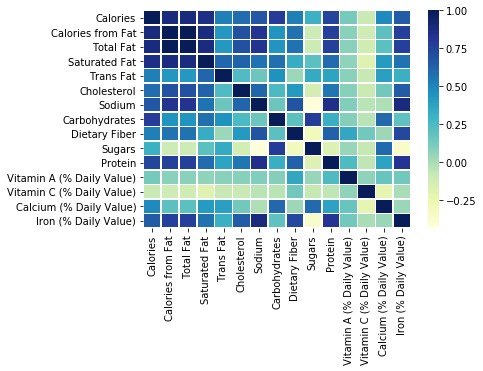

In [8]:
corr = df.corr()
sns.heatmap(corr,linewidths=.5, cmap="YlGnBu")

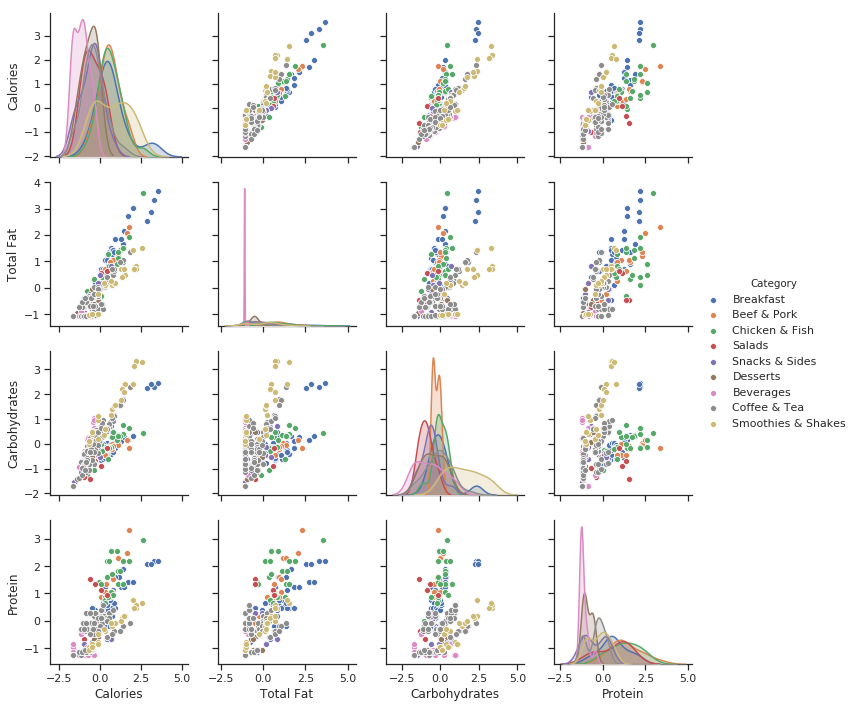

In [9]:
plotData = normalized_df[["Category","Calories","Total Fat","Carbohydrates","Protein"]]

sns.set(style="ticks")
sns.pairplot(plotData, hue="Category")

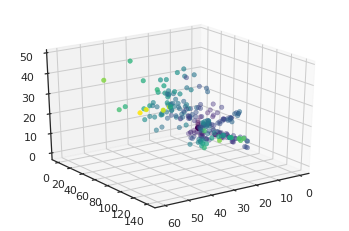

In [10]:
x = dataset["Total Fat"]
y = dataset["Carbohydrates"]
z = dataset["Protein"]
c = dataset["Calories"]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=c, cmap='viridis', linewidth=0.5);

ax.view_init(25,55)

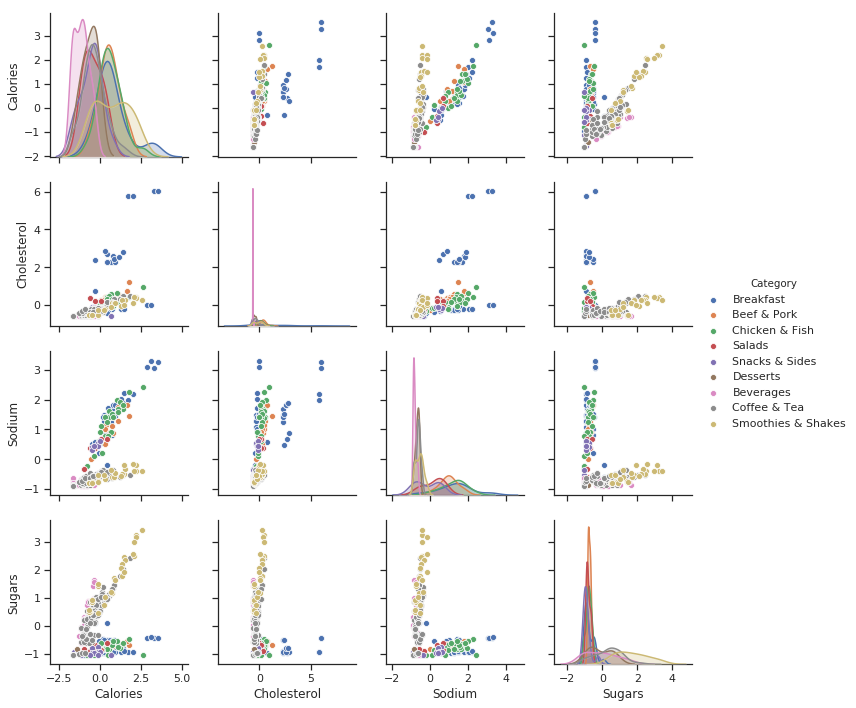

In [11]:
plotData = normalized_df[["Category","Calories","Cholesterol","Sodium","Sugars"]]

sns.set(style="ticks")
sns.pairplot(plotData, hue="Category")

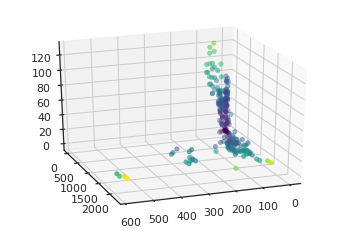

In [12]:
x = dataset["Cholesterol"]
y = dataset["Sodium"]
z = dataset["Sugars"]
c = dataset["Calories"]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=c, cmap='viridis', linewidth=0.5);

ax.view_init(25,70)

In [13]:
points = dataset.drop(['Category','Item','Serving Size'],axis=1)
points

dbScoreList = []

for i in range(2,21):
    clusterCount = i
    kmeans = KMeans(n_clusters=i)
    clusters = kmeans.fit_predict(points)

    dbScore = davies_bouldin_score(points,clusters)
    dbScoreList.append(dbScore)


clusterList = list(clusters)
dbScoreList

/home/adam/.local/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/adam/.local/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/adam/.local/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/adam/.local/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/home/adam/.local/lib/python3.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountere

[0.5049080375531603,
 0.7119836969199111,
 0.7948672957175776,
 0.6875017452313921,
 0.7471688293648517,
 0.8004439020548009,
 0.8456648391141388,
 0.8551351151369286,
 0.8758372445617372,
 0.860844717359679,
 0.8133113914631832,
 0.8442599641151366,
 0.8883714867016513,
 0.8650423460864235,
 0.9050236711697273,
 0.8853383144007435,
 0.8505738885779925,
 0.8743270495979744,
 0.8699230945528857]

In [14]:
clusterCount = 4
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(points)
clusters

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 3, 0, 3, 3, 2, 2,
       1, 2, 2, 1, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 3, 0, 2, 1, 0, 3, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3,
       3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0], dtype=int32)

In [15]:
dataPlusClusters = dataset
dataPlusClusters['Cluster'] = clusters
dataPlusClusters

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Cluster
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,5.0,0.0,260,750,31,4,3,17,10,0,25,15,2
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,3.0,0.0,25,770,30,4,3,18,6,0,25,8,2
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,8.0,0.0,45,780,29,4,2,14,8,0,25,10,2
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,10.0,0.0,285,860,30,4,2,21,15,0,30,15,2
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,8.0,0.0,50,880,30,4,2,21,6,0,25,10,2
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,210,23.0,9.0,1.0,300,960,31,4,3,26,15,2,30,20,2
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,230,26.0,13.0,0.0,250,1300,38,2,3,19,10,8,15,15,2
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,14.0,0.0,250,1410,43,3,4,19,15,8,20,20,1
8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",5.4 oz (153 g),410,180,20.0,11.0,0.0,35,1300,36,2,3,20,2,8,15,10,2
9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",5.9 oz (167 g),470,220,25.0,12.0,0.0,35,1420,42,3,4,20,6,8,15,15,1


In [16]:
for i in range(clusterCount):
    foodText = list(dataPlusClusters[dataPlusClusters['Cluster'] == i]['Item'])
    pprint.pprint(foodText)
    print("----------------------------------------------------------")
    #print(topFoods(foodText,3))

['Hotcakes',
 'Cinnamon Melts',
 'Chicken McNuggets (6 piece)',
 'Filet-O-Fish',
 'Large French Fries',
 'Caramel Latte (Large)',
 'Hazelnut Latte (Large)',
 'French Vanilla Latte (Large)',
 'Mocha (Medium)',
 'Mocha (Large)',
 'Mocha with Nonfat Milk (Large)',
 'Caramel Mocha (Medium)',
 'Caramel Mocha (Large)',
 'Nonfat Caramel Mocha (Large)',
 'Hot Chocolate (Small)',
 'Hot Chocolate (Medium)',
 'Hot Chocolate (Large)',
 'Hot Chocolate with Nonfat Milk (Large)',
 'Iced Mocha (Large)',
 'Iced Mocha with Nonfat Milk (Large)',
 'Iced Caramel Mocha (Large)',
 'Iced Nonfat Caramel Mocha (Large)',
 'Frappé Mocha (Small)',
 'Frappé Mocha (Medium)',
 'Frappé Mocha (Large)',
 'Frappé Caramel (Small)',
 'Frappé Caramel (Medium)',
 'Frappé Caramel (Large)',
 'Frappé Chocolate Chip (Small)',
 'Frappé Chocolate Chip (Medium)',
 'Frappé Chocolate Chip (Large)',
 'Vanilla Shake (Small)',
 'Vanilla Shake (Medium)',
 'Vanilla Shake (Large)',
 'Strawberry Shake (Small)',
 'Strawberry Shake (Medium)',

In [17]:
#dataPlusClusters.head(5)
#sortedData = dataPlusClusters.sort_values(by=['Cluster'])
#sortedData
len(clusters)
normalized_df = normalized_df.drop(["Category"],axis=1)
normalized_df["Cluster"] = clusters
normalized_df = normalized_df.sort_values(by=['Cluster'])
normalized_df.head(5)


,Calories,Calories from Fat,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Cluster
259,0.214754,0.232210,0.176380,0.389017,-0.470098,-0.279133,-0.520905,0.355008,-0.396851,0.748492,-0.291258,-0.142577,-0.322415,0.527005,-0.422890,0
228,1.388580,1.108280,1.044267,2.099960,3.042075,0.472739,-0.539262,1.749771,-1.043294,2.038564,-0.195890,0.267273,-0.322415,0.820540,-0.653476,0
227,0.846814,0.670245,0.728672,1.719750,1.871351,0.299230,-0.594333,1.141797,-1.043294,1.445828,-0.386626,0.267273,-0.322415,0.527005,-0.653476,0
39,0.440490,0.407424,0.413076,0.579122,-0.470098,-0.452642,-0.208837,0.676876,0.896035,0.086023,-0.672729,-0.388487,-0.322415,-0.881968,0.845334,0
226,0.395343,0.407424,0.413076,1.149436,1.871351,0.125721,-0.658582,0.605350,-1.043294,0.957693,-0.577361,0.062348,-0.322415,0.233469,-0.653476,0


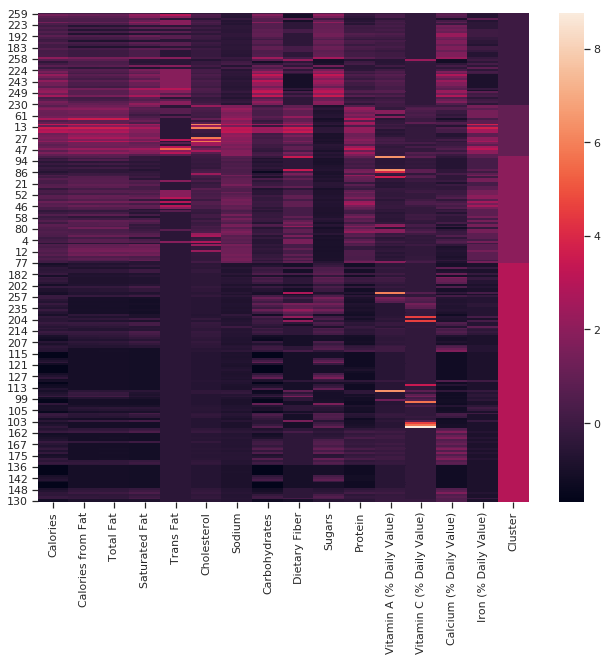

In [18]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(normalized_df)